# Day 9 of Data Science Training by `Mr. Harshit Dawar`!

## Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.drop(["PassengerId", "Fare", "Ticket", "Name"], inplace = True, axis = 1) 

In [5]:
X, y = train.drop("Survived", axis = 1), train["Survived"]

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
categorical_features = ["Sex", "Embarked", "Cabin"]
numerical_features = ["Age"]

si_categorical = SimpleImputer(strategy = "constant", fill_value="Missing")
si_numerical = SimpleImputer(strategy="mean")

transformer = ColumnTransformer(transformers=[
                        ("cat", si_categorical, categorical_features),
                        ("Num", si_numerical, numerical_features)],
                         remainder="passthrough"      
                               )

In [8]:
X = transformer.fit_transform(X)

In [9]:
X = pd.DataFrame(X, columns = ["Sex", "Embarked", "Cabin", "Age", "PClass", "SibSp","Parch"] )

In [10]:
X

,Sex,Embarked,Cabin,Age,PClass,SibSp,Parch
0,male,S,Missing,22,3,1,0
1,female,C,C85,38,1,1,0
2,female,S,Missing,26,3,0,0
3,female,S,C123,35,1,1,0
4,male,S,Missing,35,3,0,0
...,...,...,...,...,...,...,...
886,male,S,Missing,27,2,0,0
887,female,S,B42,19,1,0,0
888,female,S,Missing,29.6991,3,1,2
889,male,C,C148,26,1,0,0


In [11]:
for i in range(len(X["Cabin"])):
    X["Cabin"][i] = X["Cabin"][i][:1]

In [12]:
encoder = LabelEncoder()

In [13]:
c = ["Sex"]

transformer1 = ColumnTransformer([("encoding", encoder, c)], remainder="passthrough")


In [15]:
X["Cabin"] = encoder.fit_transform(X["Cabin"])

In [16]:
X["Embarked"] = encoder.fit_transform(X["Embarked"])
X["Sex"] = encoder.fit_transform(X["Sex"])

In [17]:
X

,Sex,Embarked,Cabin,Age,PClass,SibSp,Parch
0,1,3,7,22,3,1,0
1,0,0,2,38,1,1,0
2,0,3,7,26,3,0,0
3,0,3,2,35,1,1,0
4,1,3,7,35,3,0,0
...,...,...,...,...,...,...,...
886,1,3,7,27,2,0,0
887,0,3,1,19,1,0,0
888,0,3,7,29.6991,3,1,2
889,1,0,2,26,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
lr = LogisticRegression()

In [20]:
x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [21]:
lr.fit(x_train, y_train)

/opt/anaconda3/envs/DataScieneTraining/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
lr.score(x_test, y_test)

0.7888888888888889

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier()

In [25]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rf.score(x_test, y_test)

0.8444444444444444

# MNIST Dataset Classification

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import mnist

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
x_train.shape

(60000, 28, 28)

In [37]:
# x_train[10]

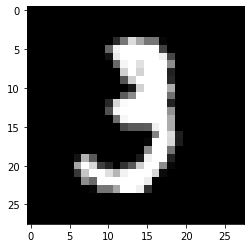

In [33]:
plt.imshow(x_train[10], cmap ="gray");

In [48]:
x_train = x_train / 255
x_test = x_test / 255

In [50]:
# Initilizing Model
model = Sequential()

# Adding Layers
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 512, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = "softmax"))

# Summary of Model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 171,658
Trainable params: 171,658
Non-trainable params: 0
________________________________________________

In [51]:
# Compiling the Model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [55]:
# Fitting The Model
trained_model = model.fit(x_train, y_train, epochs = 5, verbose = 1, batch_size = 57)

Epoch 1/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.0528 - accuracy: 0.9826
Epoch 2/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.0481 - accuracy: 0.9845
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0426 - accuracy: 0.9862
Epoch 4/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0401 - accuracy: 0.9870
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0362 - accuracy: 0.9877


In [56]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

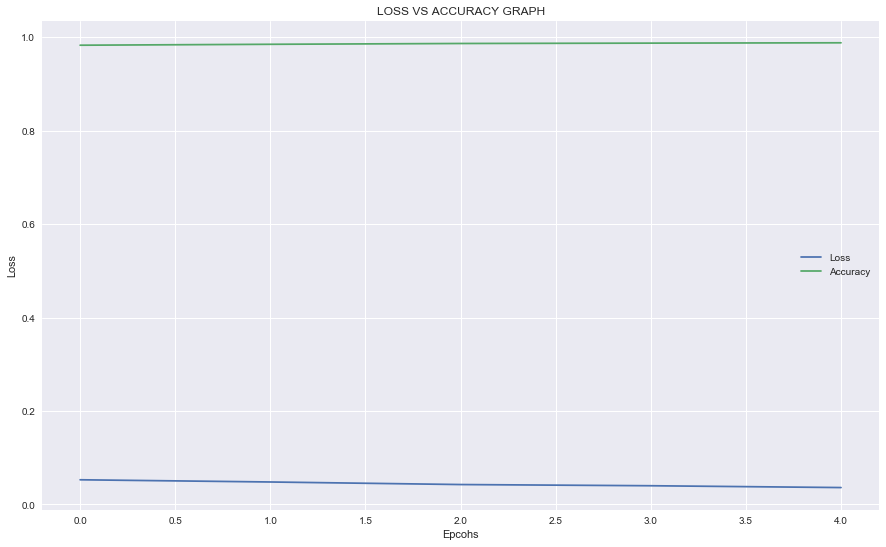

In [57]:
plt.style.use("seaborn")
plt.figure(figsize = (15,9))
plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["accuracy"])
plt.xlabel("Epcohs")
plt.ylabel("Loss")
plt.title("LOSS VS ACCURACY GRAPH")
plt.legend(["Loss", "Accuracy"])
plt.show()

In [62]:
model.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 1s 62us/step


0.9825999736785889

In [65]:
y_pred = model.predict_classes(x_test)

In [66]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [67]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [68]:
cm = confusion_matrix(y_test, y_pred)

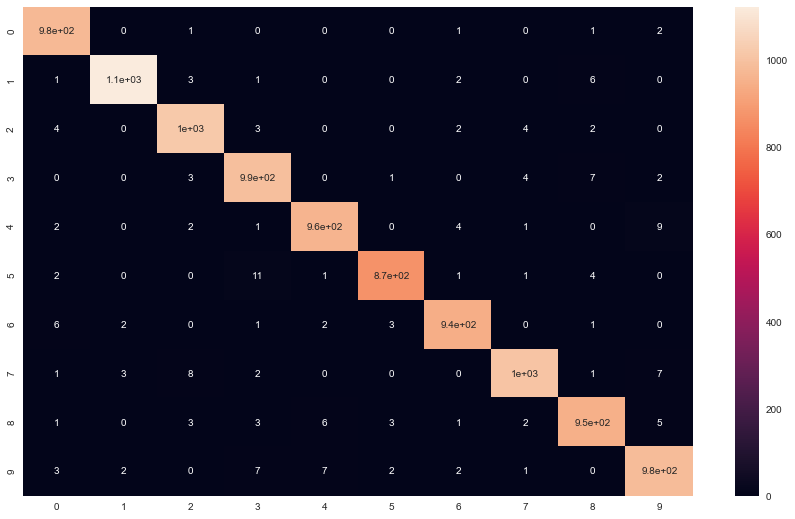

In [74]:
plt.figure(figsize = (15,9))
sns.heatmap(cm, annot = True)
plt.show()

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



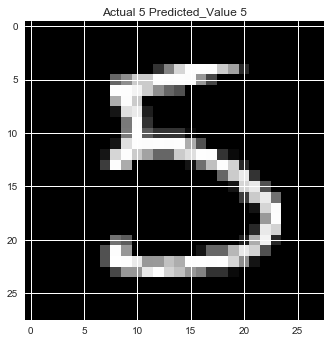

In [79]:
plt.imshow(x_test[15], cmap = "gray")
plt.title("Actual {} Predicted_Value {}".format(y_test[15], y_pred[15]))
plt.show()

# Well Done, Another Amazing Project Done